In [1]:
import numpy as np
import pygame
import matplotlib.pyplot as plt

pygame 2.0.1 (SDL 2.0.14, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
DEFAULT_INPUT = "input.txt"
input_ = open(DEFAULT_INPUT, "r")
data = input_.read()

data_splitted = data.split()

matrix = []
for line in data_splitted:
    matrix.append(list(map(int, line)))

matrix = np.array(matrix)

In [3]:
def initialise(y, x, matrix):
    response = input("Random?")
    if response == "y" or response == "Y" or response == "yes" or response == "Yes":
        cells = np.random.randint(2, size=(32, 32))
    else:
        cells = np.zeros((x, y))
        cells[0:matrix.shape[0], 0:matrix.shape[1]] = matrix
    return cells

In [4]:
dead_col = (0, 0, 0)
alive_col = (255, 255, 255)

def update(current_matrix, surface, cellsize):
    next_gen = np.zeros((current_matrix.shape[0], current_matrix.shape[1]))

    for i, j in np.ndindex(current_matrix.shape):
        alive = np.sum(current_matrix[i-1:i+2, j-1:j+2]) - current_matrix[i, j]

        if current_matrix[i, j] == 1 and (alive < 2 or alive > 3):
            next_gen[i, j] = 0
            colour = alive_col
        elif (current_matrix[i, j] == 1 and 2 <= alive <= 3) or (current_matrix[i, j] == 0 and alive == 3):
            next_gen[i, j] = 1
            colour = alive_col

        colour = colour if current_matrix[i, j] == 1 else (0,0,0)
        pygame.draw.rect(surface, colour, (i*cellsize, j*cellsize, cellsize-1, cellsize-1))

    return next_gen

Random?n


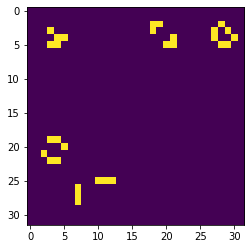

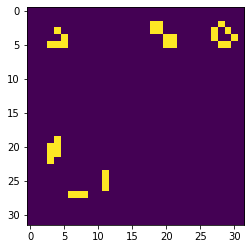

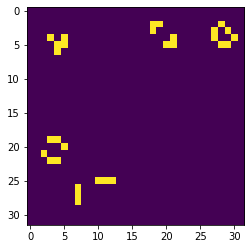

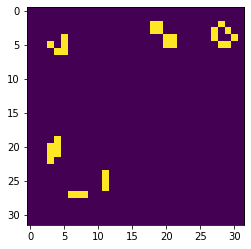

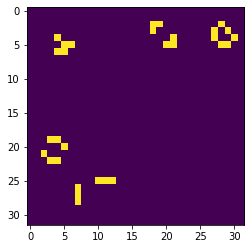

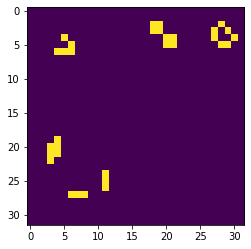

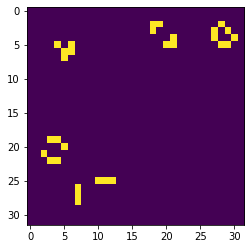

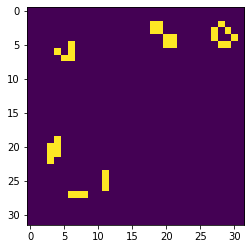

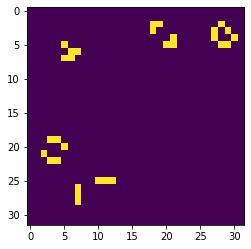

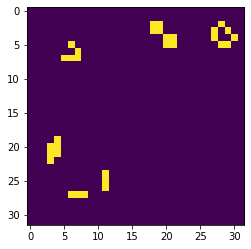

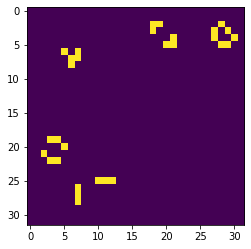

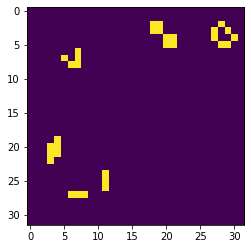

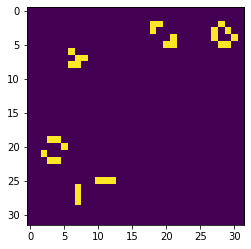

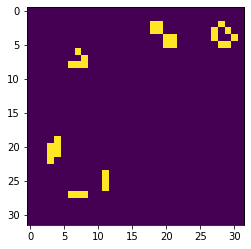

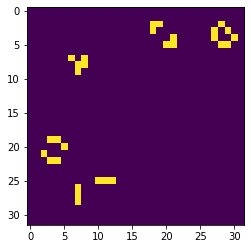

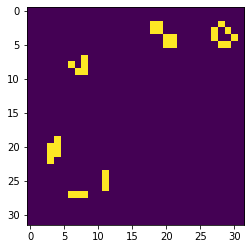

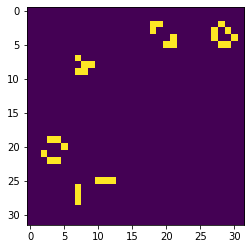

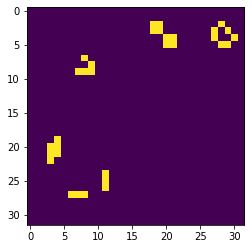

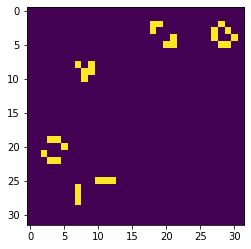

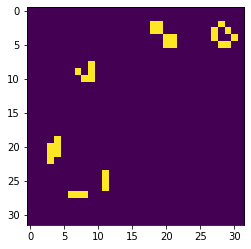

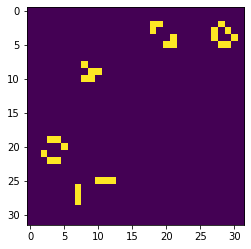

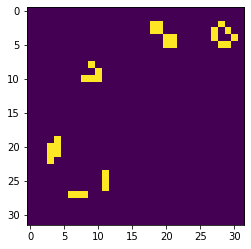

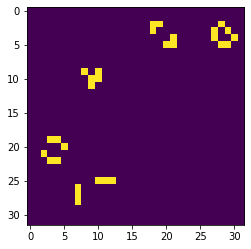

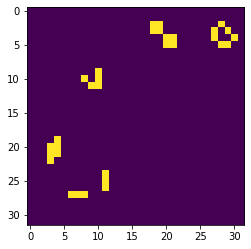

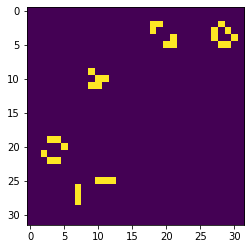

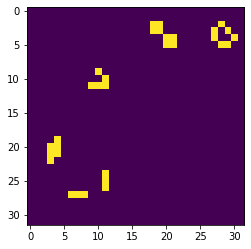

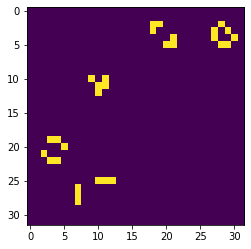

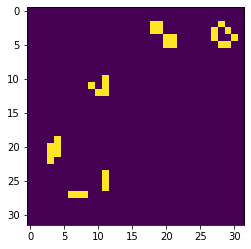

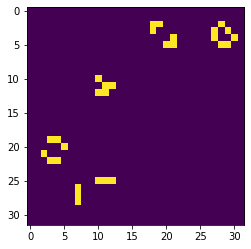

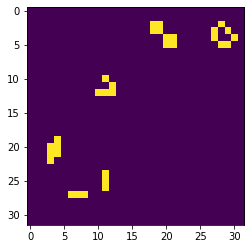

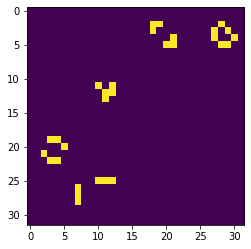

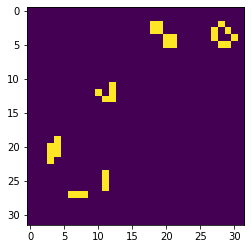

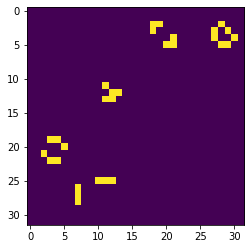

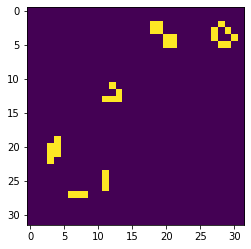

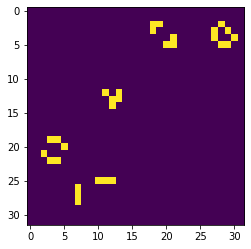

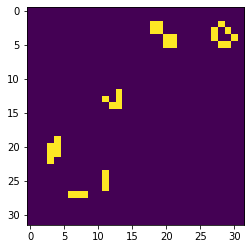

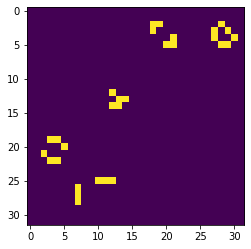

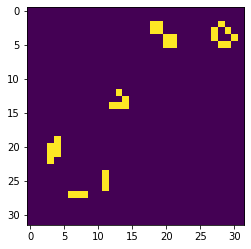

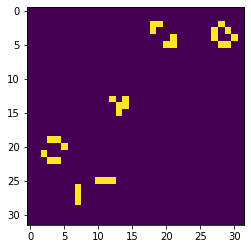

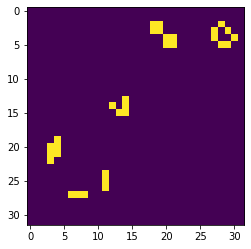

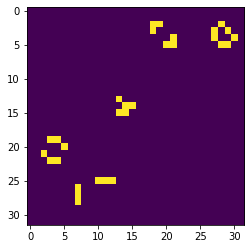

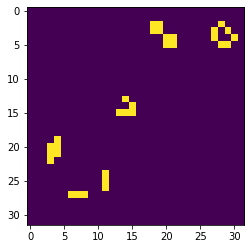

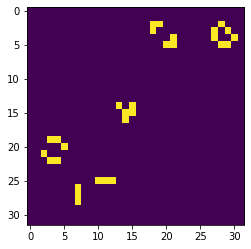

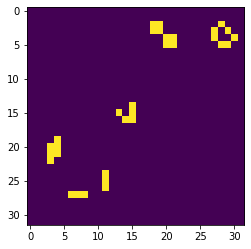

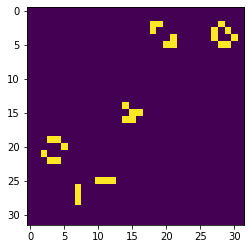

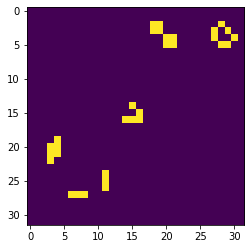

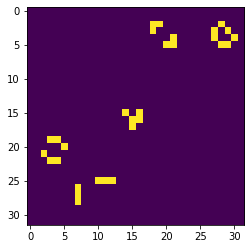

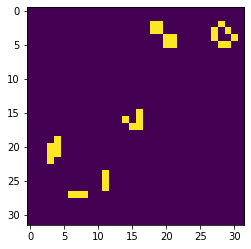

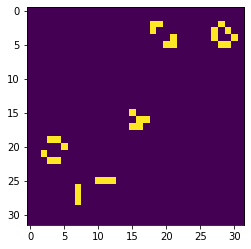

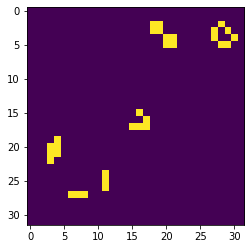

In [12]:
def run_game(x, y, cellsize=16):
    pygame.init()
    surface = pygame.display.set_mode((x * cellsize, y * cellsize))
    
    cells = initialise(x, y, matrix)
    
    clock=pygame.time.Clock()
    t = 0
    while True:
        if t == 50:
            pygame.quit()
            np.savetxt("iter50.txt", cells)
            
            return
        clock.tick(10)
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                return

        surface.fill((0, 0, 0))
        cells = update(cells, surface, cellsize)
        plt.imshow(cells.T)
        plt.show()
        pygame.display.update()
        t = t + 1

if __name__ == "__main__":
    run_game(32, 32)

In [8]:
cells = initialise(32, 32, matrix)

Random?n


In [9]:
cells

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
type(cells)

numpy.ndarray